![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv', index_col=0)
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,22
1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,22
2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,37
3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,27


In [5]:
# Visualización datos de test
dataTesting.head()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


In [6]:
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79800 entries, 0 to 79799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          79800 non-null  object 
 1   artists           79800 non-null  object 
 2   album_name        79800 non-null  object 
 3   track_name        79800 non-null  object 
 4   duration_ms       79800 non-null  int64  
 5   explicit          79800 non-null  bool   
 6   danceability      79800 non-null  float64
 7   energy            79800 non-null  float64
 8   key               79800 non-null  int64  
 9   loudness          79800 non-null  float64
 10  mode              79800 non-null  int64  
 11  speechiness       79800 non-null  float64
 12  acousticness      79800 non-null  float64
 13  instrumentalness  79800 non-null  float64
 14  liveness          79800 non-null  float64
 15  valence           79800 non-null  float64
 16  tempo             79800 non-null  float64
 17

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dt = dataTraining.copy()
df = dataTesting.copy()

In [9]:
# Preprocesamiento de datos - Artistas vs popularidad
artist_popularity = dt.groupby('artists')['popularity'].mean().to_dict()

# --- 2. Crear nueva feature ---
dt['artist_popularity'] = dt['artists'].map(artist_popularity)

# (Opcional: Si algún artista no está en el mapeo, puedes ponerle un valor neutral como la media general.)
dt['artist_popularity'].fillna(dt['artist_popularity'].mean(), inplace=True)

In [10]:
dt.head()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity,artist_popularity
0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,-10.795,...,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,22,22.000000
1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,-12.030,...,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,22,23.000000
2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,-9.661,...,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,37,20.882353
3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,-23.149,...,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0,0.000000
4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,-7.294,...,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,27,24.649573


In [23]:
features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'valence', 'tempo', 'duration_ms','artist_popularity', 'track_genre','artists'
]

In [24]:
X = dt[features]
y = dt['popularity'] 

In [25]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X['track_genre'] = encoder.fit_transform(X[['track_genre']])

In [26]:
features_test = [
        'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'valence', 'tempo', 'duration_ms', 'track_genre','artists'
]
X_test = df[features_test]

In [27]:
df = dataTesting.copy()

artist_popularity_train = X.copy()
artist_popularity_train['popularity'] = y

# Cálculo de media de popularidad por artista
artist_popularity_dict = artist_popularity_train.groupby('artists')['popularity'].mean().to_dict()

# Media general por si aparece un artista desconocido
mean_popularity = y.mean()

# --- 3. Mapear en train ---
X['artist_popularity'] = X['artists'].map(artist_popularity_dict)
X['artist_popularity'].fillna(mean_popularity, inplace=True)

# --- 4. Mapear en test ---
X_test['artist_popularity'] = X_test['artists'].map(artist_popularity_dict)
X_test['artist_popularity'].fillna(mean_popularity, inplace=True)

In [28]:
X_test.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,track_genre,artists,artist_popularity
0,0.369,0.598,-6.984,0.0304,0.00511,0.000000,0.0466,148.014,440247,world-music,Hillsong Worship,43.490566
1,0.171,0.997,-3.586,0.1180,0.00521,0.801000,0.0294,122.223,93933,grindcore,Internal Rot,13.666667
2,0.173,0.803,-10.071,0.1440,0.61300,0.001910,0.0887,75.564,213578,iranian,Zhoobin Askarieh;Ali Sasha,0.000000
3,0.683,0.511,-5.598,0.0279,0.40600,0.000197,0.5980,109.991,151387,rock,Bryan Adams,10.102564
4,0.555,0.941,-3.294,0.0481,0.48400,0.000000,0.8130,92.487,236293,j-idol,Nogizaka46,26.039216


In [29]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_test['track_genre'] = encoder.fit_transform(X_test[['track_genre']])
X_test['track_genre'] = X_test['track_genre'].astype(float) 

In [30]:
features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'valence', 'tempo', 'duration_ms','artist_popularity', 'track_genre'
]

X = X[features]

In [213]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 100, index=dataTesting.index, columns=['Popularity'])

In [214]:
#from sklearn.ensemble import HistGradientBoostingRegressor
#clf = HistGradientBoostingRegressor(max_iter=500, random_state=42,
#early_stopping=True, validation_fraction=0.1,
#n_iter_no_change=10, max_depth=10)
#clf

In [44]:
# --- 5. Entrenar XGBoost ---
import xgboost as xgb

model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=7,
    random_state=42,
    tree_method='hist'
)

In [45]:
model.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [46]:
X_test = X_test[features]

In [47]:
y_pred = model.predict(X_test)


In [48]:
y_pred = pd.DataFrame(y_pred, columns=['Popularity'])# Guardar predicciones en formato exigido en la competencia de kaggle

y_pred.to_csv('test_submission_file.csv', index_label='ID')
y_pred.head()

,Popularity
0,47.025703
1,14.745115
2,-2.464258
3,-0.947019
4,26.182095


In [36]:
### Se toma la base de train y se divide para hacer un testeo interno
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    tree_method='hist'
)

In [38]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

RMSE: 10.845352259521734
R2: 0.7628609078063444


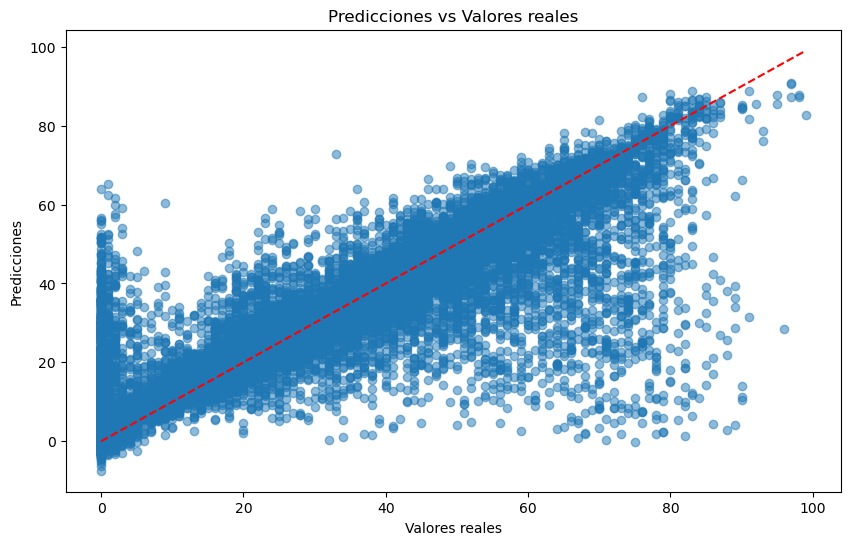

In [39]:
y_hat = model.predict(X_val)
# --- 6. Evaluar el modelo ---
mse = mean_squared_error(y_val, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_hat)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
# --- 7. Visualizar resultados ---
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_hat, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()

n_estimators=50 --> RMSE: 11.072
n_estimators=100 --> RMSE: 11.022
n_estimators=150 --> RMSE: 10.986
n_estimators=200 --> RMSE: 10.934
n_estimators=300 --> RMSE: 10.845
n_estimators=400 --> RMSE: 10.812
n_estimators=500 --> RMSE: 10.764
n_estimators=600 --> RMSE: 10.731
n_estimators=700 --> RMSE: 10.720
n_estimators=800 --> RMSE: 10.706
n_estimators=900 --> RMSE: 10.689
n_estimators=1000 --> RMSE: 10.679
n_estimators=1200 --> RMSE: 10.684
n_estimators=1500 --> RMSE: 10.689
n_estimators=1600 --> RMSE: 10.690
n_estimators=1700 --> RMSE: 10.694
n_estimators=1800 --> RMSE: 10.701
n_estimators=1900 --> RMSE: 10.704
n_estimators=2000 --> RMSE: 10.705


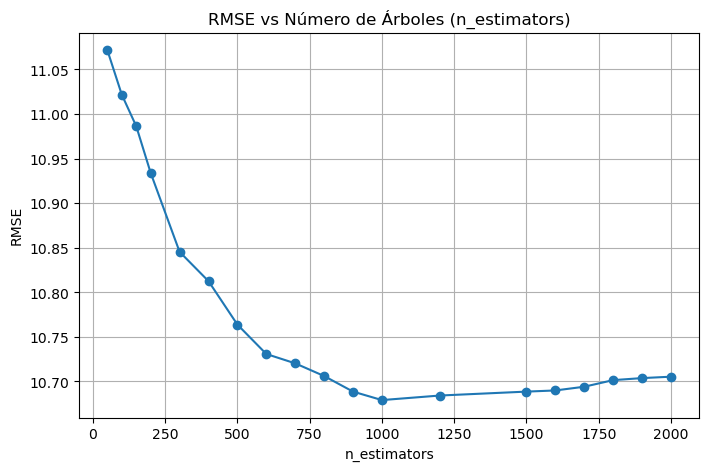

In [40]:
# --- 2. Definir valores de n_estimators a probar ---
from sklearn.metrics import root_mean_squared_error 
n_estimators_list = [50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1500,1600,1700,1800,1900, 2000]
rmse_scores = []

# --- 3. Loop para entrenar y evaluar ---
for n in n_estimators_list:
    model = xgb.XGBRegressor(
        n_estimators=n,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        tree_method='hist'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    rmse_scores.append(rmse)
    print(f"n_estimators={n} --> RMSE: {rmse:.3f}")

# --- 4. Graficar resultados ---
plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, rmse_scores, marker='o')
plt.title('RMSE vs Número de Árboles (n_estimators)')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

n_estimators=1 --> RMSE: 11.250
n_estimators=2 --> RMSE: 11.181
n_estimators=3 --> RMSE: 11.087
n_estimators=4 --> RMSE: 10.958
n_estimators=5 --> RMSE: 10.810
n_estimators=6 --> RMSE: 10.679
n_estimators=7 --> RMSE: 10.659
n_estimators=8 --> RMSE: 10.718
n_estimators=9 --> RMSE: 10.833


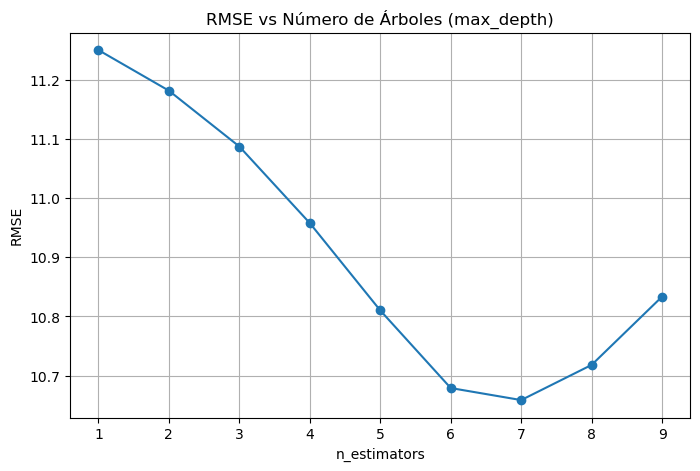

In [41]:
# --- 2. Definir valores de n_estimators a probar ---
from sklearn.metrics import root_mean_squared_error 
n_estimators_list = range(1,10,1)
rmse_scores = []

# --- 3. Loop para entrenar y evaluar ---
for n in n_estimators_list:
    model = xgb.XGBRegressor(
        n_estimators=1000,
        learning_rate=0.1,
        max_depth=n,
        random_state=42,
        tree_method='hist'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    rmse_scores.append(rmse)
    print(f"n_estimators={n} --> RMSE: {rmse:.3f}")

# --- 4. Graficar resultados ---
plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, rmse_scores, marker='o')
plt.title('RMSE vs Número de Árboles (max_depth)')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


Resultados de RMSE por variable agregada:
Agregando danceability --> RMSE: 10.659
Agregando energy --> RMSE: 10.659
Agregando loudness --> RMSE: 10.659
Agregando speechiness --> RMSE: 10.659
Agregando acousticness --> RMSE: 10.659
Agregando instrumentalness --> RMSE: 10.659
Agregando valence --> RMSE: 10.659
Agregando tempo --> RMSE: 10.659
Agregando duration_ms --> RMSE: 10.659
Agregando artist_popularity --> RMSE: 10.659
Agregando track_genre --> RMSE: 10.659


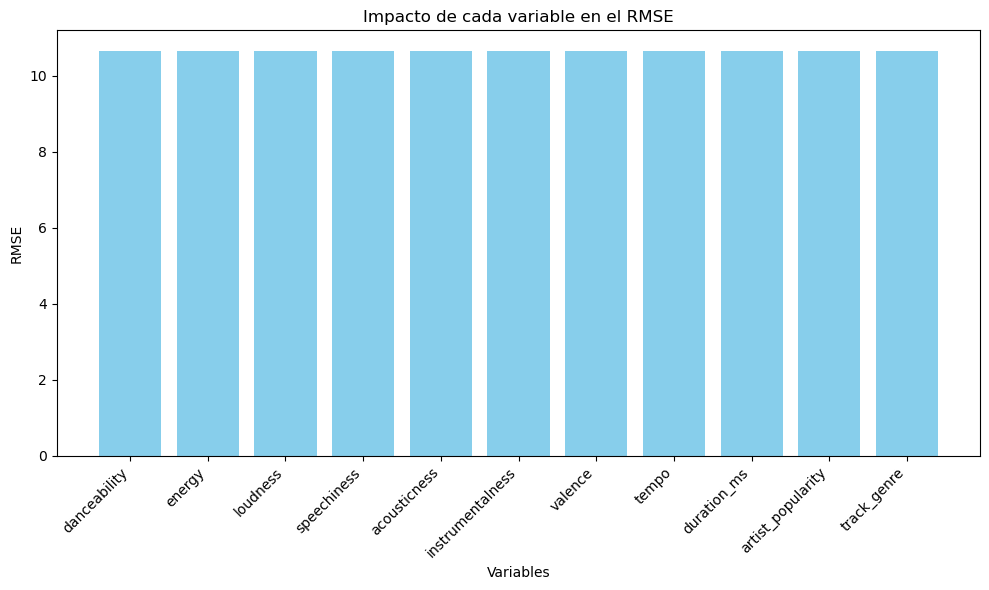

In [43]:

features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'valence', 'tempo', 'duration_ms','artist_popularity', 'track_genre'
]

rmse_scores = []
for var in features:
    X_train_new = X_train.copy()  # Copiar las variables ya procesadas
    X_train_new[var] = X_train[var]  # Agregar la nueva variable a probar
    X_test_new = X_val.copy()  # Copiar las variables ya procesadas
    X_test_new[var] = X_val[var]  # Agregar la nueva variable a probar

    # Entrenar el modelo con la variable añadida
    model = xgb.XGBRegressor(
        n_estimators=1000,
        learning_rate=0.1,
        max_depth=7,
        random_state=42,
        tree_method='hist'
    )
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    rmse_scores.append((var, rmse))

# Mostrar los resultados RMSE por variable
print("\nResultados de RMSE por variable agregada:")
for var, rmse in rmse_scores:
    print(f"Agregando {var} --> RMSE: {rmse:.3f}")

# Visualizar los resultados en una gráfica
variables = [var for var, _ in rmse_scores]
rmse_values = [rmse for _, rmse in rmse_scores]

plt.figure(figsize=(10, 6))
plt.bar(variables, rmse_values, color='skyblue')
plt.xlabel('Variables')
plt.ylabel('RMSE')
plt.title('Impacto de cada variable en el RMSE')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mayor claridad
plt.tight_layout()  # Asegurarse de que no se corten las etiquetas
plt.show()